In [222]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [223]:
train_df = pd.read_csv("train.csv")
train_df.head()

# Behavioural attributes:
# FAVC: Frequent consumption of high caloric food
# FCVC: Frequency of consumption of vegetables
# NCP: Number of main meals
# CAEC: Consumption of food between meals
# CH20: Consumption of water daily
# CALC: Consumption of alcohol
# SCC: Calories consumption monitoring,
# FAF: Physical activity frequency,
# TUE: Time using technology devices,
# MTRANS: Transportation used.

# Physical attributes:
# Age
# Height
# Weight
# Genderx

#NObesity values:
# Underweight: Less than 18.5
# Normal: 18.5 to 24.9
# Overweight: 25.0 to 29.9
# Obesity I: 30.0 to 34.9
# Obesity II: 35.0 to 39.9
# Obesity III: Higher than 40

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [224]:
train_df.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [225]:
train_df['NObeyesdad'].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

In [226]:
train_df['NObeyesdad'] = train_df['NObeyesdad'].replace({'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6})

In [227]:
train_df['MTRANS'].unique()

array(['Public_Transportation', 'Automobile', 'Walking', 'Motorbike',
       'Bike'], dtype=object)

In [228]:
transportation_obesity = train_df.groupby('MTRANS')['NObeyesdad'].mean().sort_values(ascending=False)

transportation_obesity

MTRANS
Public_Transportation    3.323306
Automobile               3.201188
Motorbike                1.868421
Bike                     1.781250
Walking                  1.629550
Name: NObeyesdad, dtype: float64

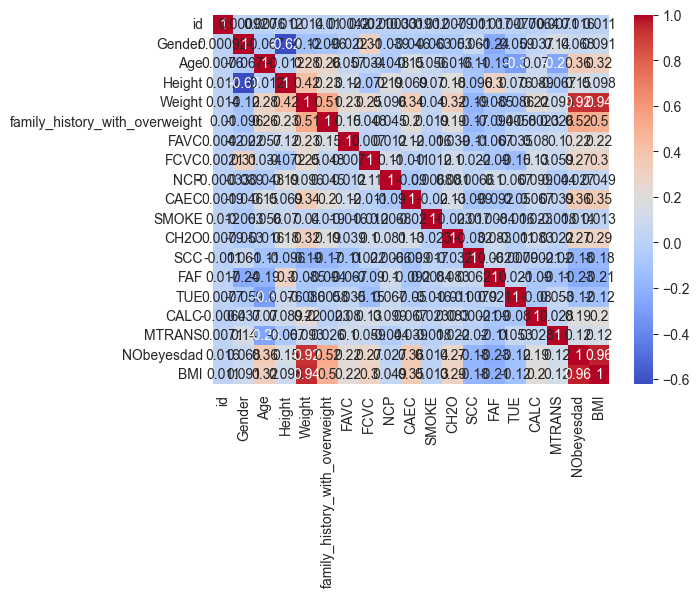

In [229]:
def preprocess_data(df):
    df['family_history_with_overweight'] = df['family_history_with_overweight'].replace({'no': 0, 'yes': 1})
    df['FAVC'] = df['FAVC'].replace({'no': 0, 'yes': 1})
    df['SMOKE'] = df['SMOKE'].replace({'no': 0, 'yes': 1})
    df['SCC'] = df['SCC'].replace({'no': 0, 'yes': 1})
    df['CAEC'] = df['CAEC'].replace({'no': 3, 'Sometimes': 2, 'Frequently': 1, 'Always': 0})
    df['CALC'] = df['CALC'].replace({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
    df['MTRANS'] = df['MTRANS'].replace({'Walking': 0, 'Bike': 1, 'Motorbike': 2, 'Automobile': 3, 'Public_Transportation': 4})
    df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})
    df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2
    numeric_df = df.select_dtypes(include=[np.number])
    return numeric_df


numeric_df = preprocess_data(train_df)

correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [238]:
physical_genetic_df = train_df[['NObeyesdad', 'Age', 'Height', 'Weight','Gender', 'family_history_with_overweight', 'BMI']]
physical_genetic_df.head()

,NObeyesdad,Age,Height,Weight,Gender,family_history_with_overweight,BMI
0,3,24.443011,1.699998,81.669950,0,1,282595.647630
1,1,18.000000,1.560000,57.000000,1,1,234220.907298
2,0,18.000000,1.711460,50.165754,1,1,171267.057985
3,6,20.952737,1.710730,131.274851,1,1,448557.984029
4,3,31.641081,1.914186,93.798055,0,1,255991.509829


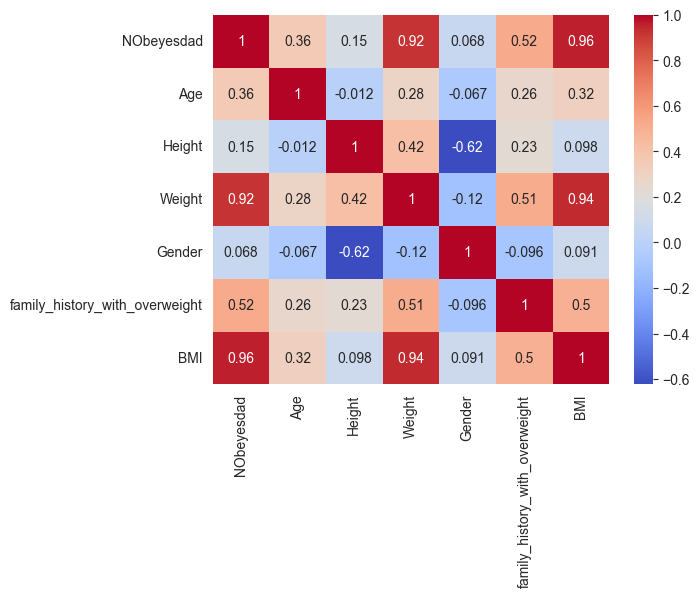

In [239]:
numeric_df = physical_genetic_df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [232]:
train_df.head()
behavioural_df = train_df[['NObeyesdad', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'CALC', 'SCC', 'FAF', 'TUE', 'MTRANS']]
behavioural_df.head()

,NObeyesdad,FAVC,FCVC,NCP,CAEC,CH2O,CALC,SCC,FAF,TUE,MTRANS
0,3,1,2.000000,2.983297,2,2.763573,1,0,0.000000,0.976473,4
1,1,1,2.000000,3.000000,1,2.000000,0,0,1.000000,1.000000,3
2,0,1,1.880534,1.411685,2,1.910378,0,0,0.866045,1.673584,4
3,6,1,3.000000,3.000000,2,1.674061,1,0,1.467863,0.780199,4
4,3,1,2.679664,1.971472,2,1.979848,1,0,1.967973,0.931721,4


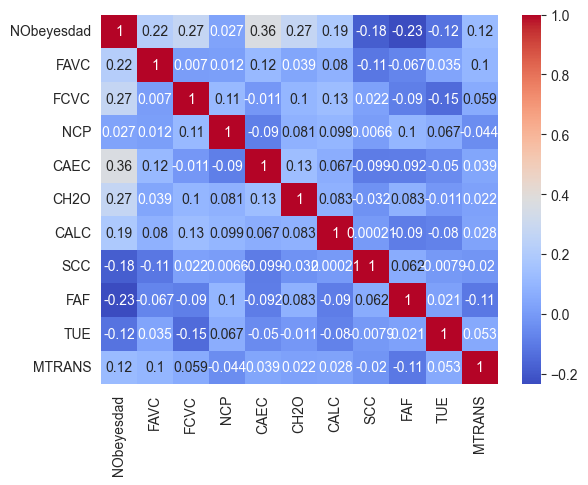

In [233]:
numeric_df = behavioural_df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

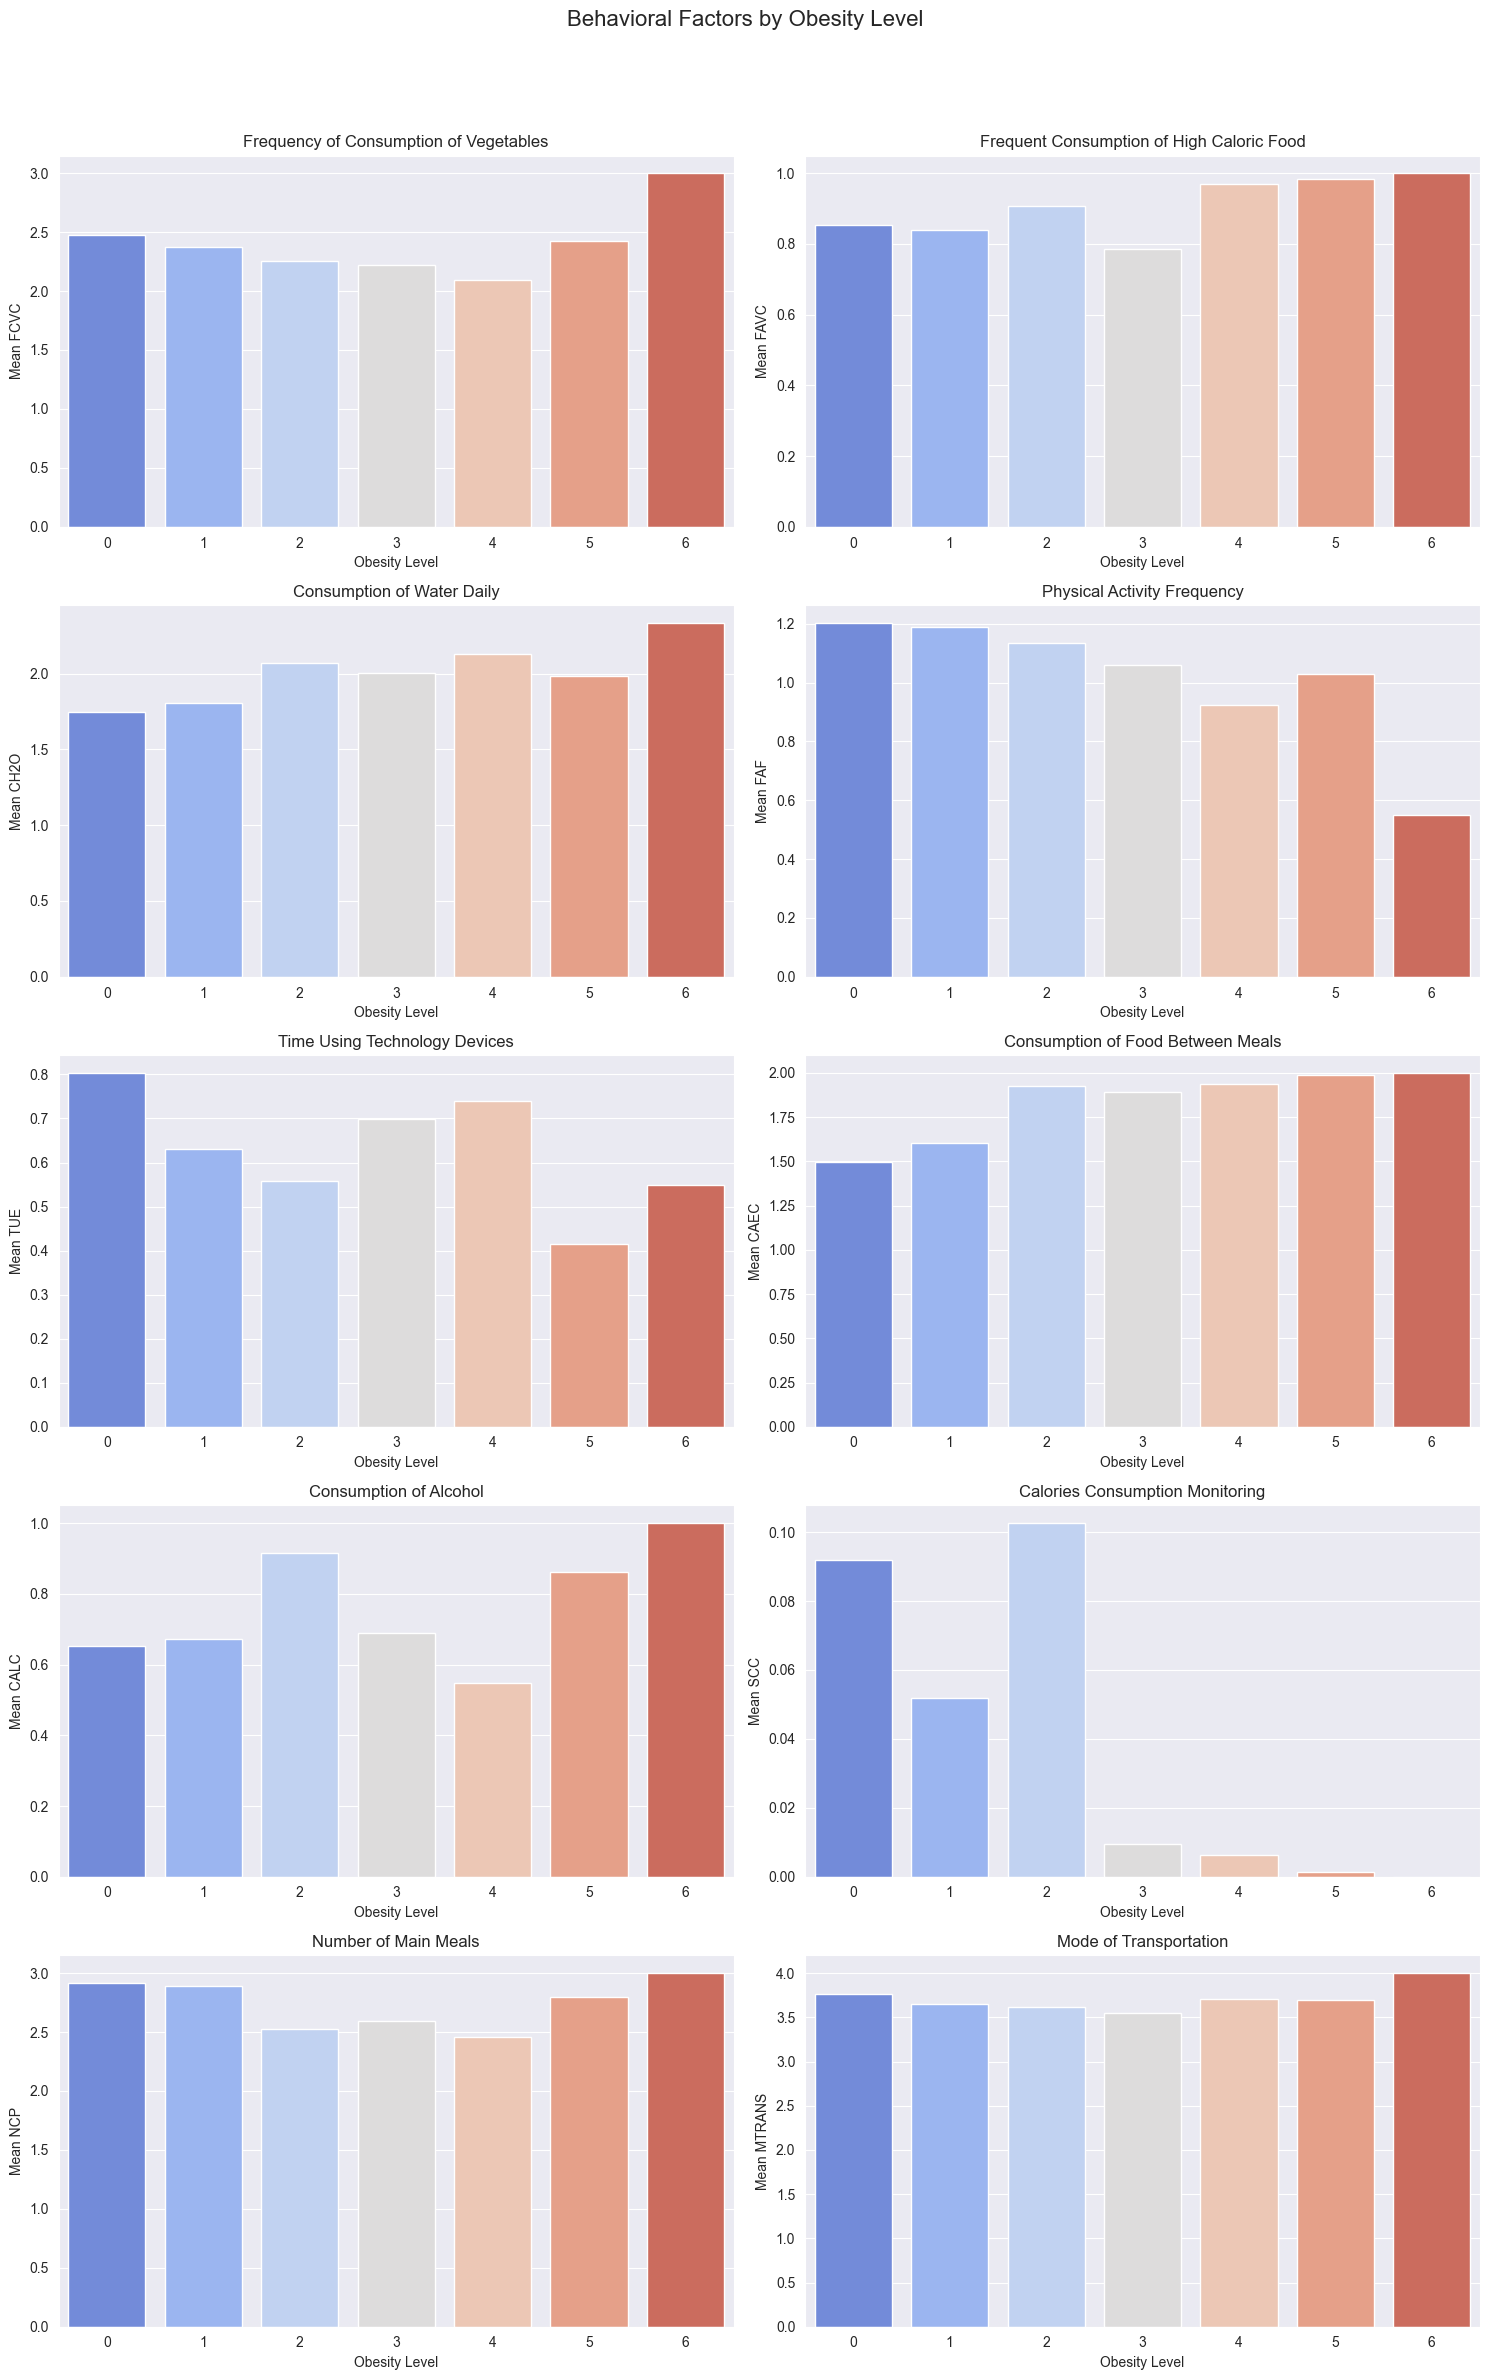

In [234]:
grouped_by_obesity = behavioural_df.groupby('NObeyesdad').mean()

fig, axes = plt.subplots(5, 2, figsize=(15, 25))
axes = axes.flatten()
fig.suptitle('Behavioral Factors by Obesity Level', fontsize=16)

behavioral_attributes_with_mtrans = {
    'FCVC': 'Frequency of Consumption of Vegetables',
    'FAVC': 'Frequent Consumption of High Caloric Food',
    'CH2O': 'Consumption of Water Daily',
    'FAF': 'Physical Activity Frequency',
    'TUE': 'Time Using Technology Devices',
    'CAEC': 'Consumption of Food Between Meals',
    'CALC': 'Consumption of Alcohol',
    'SCC': 'Calories Consumption Monitoring',
    'NCP': 'Number of Main Meals',
    'MTRANS': 'Mode of Transportation'
}

for ax, (attribute, title) in zip(axes, behavioral_attributes_with_mtrans.items()):
    sns.barplot(x=grouped_by_obesity.index, y=attribute, data=grouped_by_obesity, ax=ax, palette='coolwarm')
    ax.set_title(title)
    ax.set_xlabel('Obesity Level')
    ax.set_ylabel(f'Mean {attribute}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

for i in range(len(behavioral_attributes_with_mtrans), len(axes)):
    fig.delaxes(axes[i])

plt.show()

In [236]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier

class ModelTrainer:
    def __init__(self, data, target_name):
        self.data = data
        self.target_name = target_name
        self.models = {
            "Logistic Regression": LogisticRegression(max_iter=1000),
            "Decision Tree": DecisionTreeClassifier(),
            "Random Forest": RandomForestClassifier(),
            "SVM": SVC(),
            "KNN": KNeighborsClassifier(),
            "Gradient Boosting": GradientBoostingClassifier(),
            "AdaBoost": AdaBoostClassifier(),
            "Gaussian Naive Bayes": GaussianNB(),
            "Stochastic Gradient Descent": SGDClassifier(),
            "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
        }
        self.results = {}
        
    def prepare_data(self):
        X = self.data.drop([self.target_name], axis=1)
        y = self.data[self.target_name]
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        scaler = StandardScaler()
        self.X_train_scaled = scaler.fit_transform(self.X_train)
        self.X_test_scaled = scaler.transform(self.X_test)
        
    def train_and_evaluate(self):
        for name, model in self.models.items():
            model.fit(self.X_train_scaled, self.y_train)
            y_pred = model.predict(self.X_test_scaled)
            accuracy = accuracy_score(self.y_test, y_pred)
            self.results[name] = accuracy
        return self.results


trainer = ModelTrainer(data=behavioural_df, target_name='NObeyesdad')
trainer.prepare_data()
results = trainer.train_and_evaluate()

results

{'Logistic Regression': 0.4802504816955684,
 'Decision Tree': 0.5970616570327553,
 'Random Forest': 0.6478805394990366,
 'SVM': 0.5888728323699421,
 'KNN': 0.5960982658959537,
 'Gradient Boosting': 0.6763005780346821,
 'AdaBoost': 0.5221579961464354,
 'Gaussian Naive Bayes': 0.5055394990366089,
 'Stochastic Gradient Descent': 0.41763005780346824,
 'XGBoost': 0.6734104046242775}

In [237]:
trainer = ModelTrainer(data=train_df, target_name='NObeyesdad')
trainer.prepare_data()
results = trainer.train_and_evaluate()

results

{'Logistic Regression': 0.8651252408477842,
 'Decision Tree': 0.8429672447013488,
 'Random Forest': 0.8983622350674374,
 'SVM': 0.8733140655105973,
 'KNN': 0.7591522157996147,
 'Gradient Boosting': 0.901252408477842,
 'AdaBoost': 0.5705684007707129,
 'Gaussian Naive Bayes': 0.7721579961464354,
 'Stochastic Gradient Descent': 0.7254335260115607,
 'XGBoost': 0.9053468208092486}

In [248]:
import unittest

class TestPreprocessData(unittest.TestCase):
    def setUp(self):
        self.sample_data = {
            'family_history_with_overweight': ['yes', 'no'],
            'FAVC': ['yes', 'no'],
            'SMOKE': ['yes', 'no'],
            'SCC': ['yes', 'no'],
            'CAEC': ['Always', 'Sometimes'],
            'CALC': ['no', 'Frequently'],
            'MTRANS': ['Walking', 'Bike'],
            'Gender': ['Male', 'Female'],
            'Weight': [70, 55],
            'Height': [175, 160]
        }
        self.df = pd.DataFrame(self.sample_data)

    def test_numeric_conversion(self):
        numeric_df = preprocess_data(self.df.copy())
        
        self.assertTrue(all(np.issubdtype(dtype, np.number) for dtype in numeric_df.dtypes), "Not all columns are numeric.")

    def test_bmi_calculation(self):
        expected_bmi = [22.857, 21.484]
        
        numeric_df = preprocess_data(self.df.copy())
        
        np.testing.assert_almost_equal(numeric_df['BMI'].values, expected_bmi, decimal=3, err_msg="BMI calculation incorrect.")

def run_tests():
    suite = unittest.TestLoader().loadTestsFromTestCase(TestPreprocessData)
    unittest.TextTestRunner(verbosity=2).run(suite)

run_tests()

test_bmi_calculation (__main__.TestPreprocessData.test_bmi_calculation) ... ok
test_numeric_conversion (__main__.TestPreprocessData.test_numeric_conversion) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.010s

OK
